In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
data=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data=data.drop(columns=["RowNumber",'CustomerId',"Surname"])

In [8]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
  data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [10]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
data['Geography_Germany']=data['Geography_Germany'].astype(int)
data['Geography_Spain']=data['Geography_Spain'].astype(int)
data['Gender_Male']=data['Gender_Male'].astype(int)

In [12]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
x=data.drop(columns=['Exited'])
y=data['Exited']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
 model=Sequential()

In [36]:
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │            22 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 531 (2.08 KB)

 Trainable params: 287 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

In [38]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [63]:
history=model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3248 - val_accuracy: 0.8587 - val_loss: 0.3525
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3327 - val_accuracy: 0.8569 - val_loss: 0.3468
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3308 - val_accuracy: 0.8587 - val_loss: 0.3477
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8596 - loss: 0.3341 - val_accuracy: 0.8469 - val_loss: 0.3471
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3263 - val_accuracy: 0.8562 - val_loss: 0.3485
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3347 - val_accuracy: 0.8562 - val_loss: 0.3476
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3311 - val_accuracy: 0.8531 - val_loss: 0.3470
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3252 - val_accuracy: 0.

In [65]:
model.layers[0].get_weights()

[array([[ 8.47857893e-02,  2.18726158e-01,  1.64335683e-01,
          8.22186843e-02, -5.98295219e-03,  6.33276477e-02],
        [-1.94414318e-01,  5.48201025e-01, -7.07265377e-01,
         -1.00207996e+00, -1.94238648e-01, -3.40882510e-01],
        [-8.78144056e-02, -6.56943440e-01,  2.51183033e-01,
          2.72563007e-02,  6.52813971e-01,  6.40923716e-03],
        [ 3.63052458e-01, -1.16514206e-01,  4.92739648e-01,
          3.00422348e-02,  2.11180281e-02, -1.34539872e-01],
        [ 1.05253971e+00,  1.43027097e-01, -1.33778229e-01,
          6.33337572e-02,  1.82491362e-01, -1.33700120e+00],
        [-6.12089783e-02, -4.48797464e-01,  2.49135554e-01,
         -4.61849533e-02,  7.48035312e-01, -2.36199237e-02],
        [-5.05873740e-01, -3.81418675e-01, -3.36791962e-01,
         -3.67940396e-01,  5.19926369e-01, -4.32975054e-01],
        [-1.20919547e-03,  8.29511508e-02,  2.68469844e-02,
         -2.46011782e-02, -1.26463294e-01, -1.77768171e-02],
        [-2.40718454e-01, -5.999

In [66]:
test=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [67]:
y_pred=np.where(test>0.5,1,0)

In [68]:
 from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test,y_pred)

0.861

In [74]:
import matplotlib.pyplot as plt

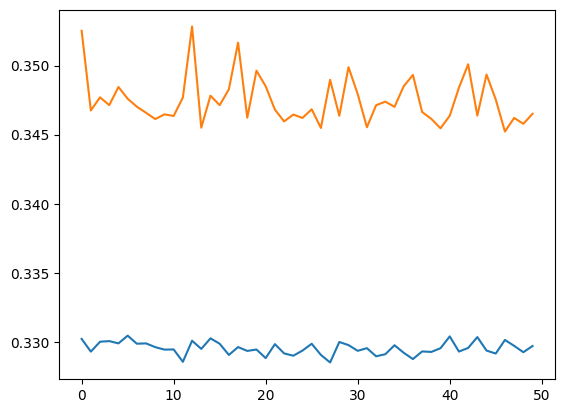

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

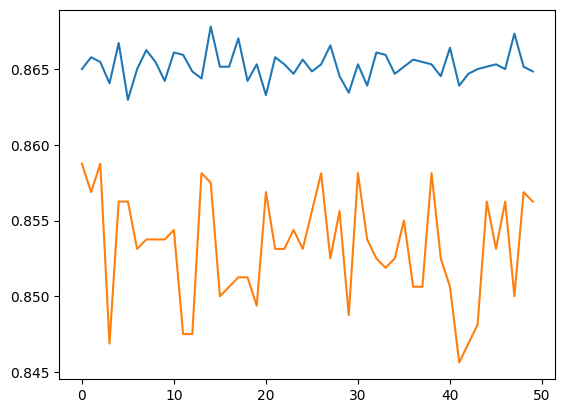

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])